In [1]:
res_path = "C:\\Users\\Geoffroy Leconte\\Documents\\doctorat\\code\\docGL\\amdahl_benchmarks\\results"
using DataFrames, SolverBenchmark, SolverTools, JLD2, Plots

function open_file(path)
    file = jldopen(path, "r")
    df_out = file["stats"]
    close(file)
    return df_out
end

┌ Info: Precompiling DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1317
┌ Info: Precompiling SolverBenchmark [581a75fa-a23a-52d0-a590-d6201de2218a]
└ @ Base loading.jl:1317
┌ Info: Precompiling SolverTools [b5612192-2639-5dc1-abfe-fbedd65fab29]
└ @ Base loading.jl:1317


open_file (generic function with 1 method)

In [2]:
fgur3 = jldopen(string(res_path, "\\gurobi_scaling_lp3.jld2"), "r")  # no display
gurobi = fgur3["stats"];
close(fgur3)
fcplex3 = jldopen(string(res_path, "\\cplex_scaling_lp3.jld2"), "r") # maj cplex.jl, single thread 
cplex = fcplex3["stats"];
close(fcplex3)
fxpress2 = jldopen(string(res_path, "\\xpress_scaling_lp2.jld2"), "r")  #tol pdd 1e-8, feas 1e-6
xpress = fxpress2["stats"];
close(fxpress2)

In [3]:
rip_mono = open_file(string(res_path, "\\G-2021-03_lp_mono.jld2"));

rip_mono1 = open_file(string(res_path, "\\ripqp_mono_1_lp.jld2")); # normal
rip_mono2 = open_file(string(res_path, "\\ripqp_mono_2_lp.jld2")); # rm bug simd
rip_mono3 = open_file(string(res_path, "\\ripqp_mono_3_lp.jld2")); # new Q scaling
rip_mono4 = open_file(string(res_path, "\\ripqp_mono_4_lp.jld2")); # no scale Q change regu
rip_mono5 = open_file(string(res_path, "\\ripqp_mono_5_lp.jld2")); # write struct
rip_mono12 = open_file(string(res_path, "\\ripqp_mono_PC_lp.jld2"));
rip_mono_nrtol1 = open_file(string(res_path, "\\ripqp_mono_nrtol_1_lp.jld2"));
rip_mono_d1 = open_file(string(res_path, "\\ripqp_dynamic_1_lp.jld2"));
rip_mono_c1 = open_file(string(res_path, "\\ripqp_ccorr_1_lp.jld2"));
rip_mono_c2 = open_file(string(res_path, "\\ripqp_ccorr_2_lp.jld2")); # ccorr time
rip_mono_c3 = open_file(string(res_path, "\\ripqp_ccorr_3_lp.jld2")); # ccorr time, QP min 15
rip_mono_c4 = open_file(string(res_path, "\\ripqp_ccorr_4_lp.jld2")); # test ccorr QP min 20
rip_multi1 = open_file(string(res_path, "\\ripqp_multi_1_lp.jld2"));
rip_multi_d1 = open_file(string(res_path, "\\ripqp_multi_dynamic_1_lp.jld2"));

# K2_5
rip_monoK251 = open_file(string(res_path, "\\ripqp_mono_K25_1_lp.jld2"));
rip_mono_dK251 = open_file(string(res_path, "\\ripqp_dynamic_K25_1_lp.jld2"));
rip_multiK251 = open_file(string(res_path, "\\ripqp_multi_K25_1_lp.jld2"));
rip_multi_dK251 = open_file(string(res_path, "\\ripqp_multi_dynamic_K25_1_lp.jld2"));

# K2_5 one step
rip_monoosK251 = open_file(string(res_path, "\\ripqp_mono_osK25_1_lp.jld2")); # r, γ =  T(0.999), T(0.05)
rip_monoosK252 = open_file(string(res_path, "\\ripqp_mono_osK25_2_lp.jld2")); # r, γ =  T(0.95), T(0.1)
rip_monoIPFK21 = open_file(string(res_path, "\\ripqp_mono_IPFK2_1_lp.jld2")); # r, γ =  T(0.999), T(0.05)
rip_monoIPFK22 = open_file(string(res_path, "\\ripqp_mono_IPFK2_2_lp.jld2")); # r, γ =  T(0.95), T(0.1)

# comparisons zoom1 & refinement
rip_monoK2 = open_file(string(res_path, "\\ripqp_mono_K2_lp.jld2"));
rip_monoK22 = open_file(string(res_path, "\\ripqp_mono_K22_lp.jld2"));
rip_multiK2 = open_file(string(res_path, "\\ripqp_multi_K2_lp.jld2"));
rip_mono_z = open_file(string(res_path, "\\ripqp_mono_z_lp.jld2")); # ϵ_rbz = 1e-3
rip_mono_z2 = open_file(string(res_path, "\\ripqp_mono_z2_lp.jld2")); # ϵ_rbz = 1e-7
rip_multi_z = open_file(string(res_path, "\\ripqp_multi_z_lp.jld2")); # ϵ_pdd32 = 1e-4
rip_multi_z2 = open_file(string(res_path, "\\ripqp_multi_z2_lp.jld2")); # ϵ_pdd32 = 1.0 
rip_mono_r = open_file(string(res_path, "\\ripqp_mono_r_lp.jld2")); # ϵ_rbz = 1e-5
rip_mono_r2 = open_file(string(res_path, "\\ripqp_mono_r2_lp.jld2")); # ref pd
rip_multi_r = open_file(string(res_path, "\\ripqp_multi_r_lp.jld2")); 
rip_multi_r2 = open_file(string(res_path, "\\ripqp_multi_r2_lp.jld2")); # ϵ_pdd32 = 1.0 
rip_multi_r3 = open_file(string(res_path, "\\ripqp_multi_r3_lp.jld2")); # ϵ_pdd32 = 1.0  ref pd
rip_multi_r4 = open_file(string(res_path, "\\ripqp_multi_r4_lp.jld2")); # ϵ_pdd32 = 1.0  ref pd

# krylov
rip_minres1 = open_file(string(res_path, "\\ripqp_minres_1_lp.jld2")); #x/s < 1/10
rip_minres2 = open_file(string(res_path, "\\ripqp_minres_2_lp.jld2")); #μ < 1/10

rip_K1 = open_file(string(res_path, "\\ripqp_K1_lp.jld2")); 
# rip_svc2 = open_file(string(res_path, "\\ripqp_mono_solvercore2_lp.jld2")); #no type indications

rip_ps1 = open_file(string(res_path, "\\ripqp_presolve_1_lp.jld2"));


In [4]:
stats_lp = Dict(
#                 :cplex => cplex,
#                 :gurobi => gurobi,
#               :ripqp_mono        => rip_mono,
              :ripqp_mono1       => rip_mono1,
#                 :ripqp_mono12       => rip_mono12,
#                 :ripqp_mono2       => rip_mono2,
                :ripqp_mono3       => rip_mono3,
#                 :ripqp_mono4       => rip_mono4,
                :ripqp_mono5       => rip_mono5,
                # :ripqp_mono_nrtol1 => rip_mono_nrtol1,
#               :ripqp_mono_d1   => rip_mono_d1,
#                 :ripqp_mono_c1   => rip_mono_c1,
#                 :ripqp_mono_c2   => rip_mono_c2,
#                 :ripqp_mono_c3   => rip_mono_c3,
#                 :ripqp_mono_c4   => rip_mono_c4,
#               :rip_monoK251    => rip_monoK251,
#               :rip_mono_dK251  => rip_mono_dK251,
#                 :rip_monoK2      => rip_monoK2,
#                 :rip_monoK22      => rip_monoK22,
#                 :rip_mono_z      => rip_mono_z,
#                 :rip_mono_z2      => rip_mono_z2,
#                 :rip_mono_r      => rip_mono_r,
#                 :rip_mono_r2      => rip_mono_r2,
#                   :rip_minres1 => rip_minres1,
#                  :rip_minres2 => rip_minres2,
#                 :ripqp_K1sne => rip_K1,
#                 :rip_svc2 => rip_svc2,
#                   :rip_ps1 => rip_ps1
               )

Dict{Symbol, DataFrame} with 3 entries:
  :ripqp_mono5 => 87×32 typename(DataFrame). Omitted printing of 25 columns…
  :ripqp_mono1 => 87×32 typename(DataFrame). Omitted printing of 25 columns…
  :ripqp_mono3 => 87×32 typename(DataFrame). Omitted printing of 25 columns…

In [5]:
# using Query, Statistics
# q1 = @from i in stats_lp[:ripqp_mono_c3] begin
#             @where i.nvar <= 100
#             @select i.nvar
#             @collect
#        end
# length(q1)

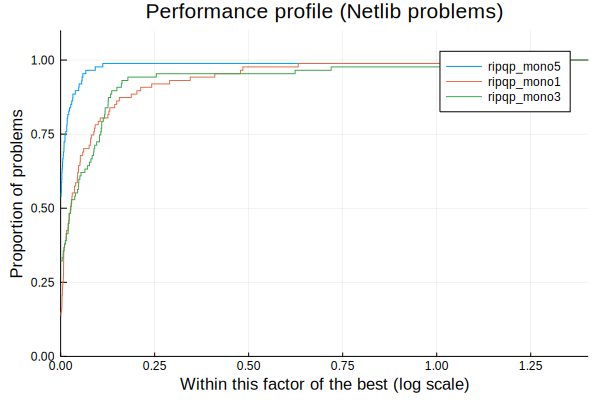

In [6]:
cost = df -> df.elapsed_time + (df.status .!= :acceptable) * Inf 
perf = performance_profile(stats_lp, cost,legend=:topright)
# plot(perf, )
title!("Performance profile (Netlib problems)")

In [7]:
rip_mono1bis = copy(rip_mono1);
rip_mono1bis.iter .*= 2;

stats_it = Dict(
                :rip_mono1   => rip_mono1bis,
#                 :rip_monoosK251 => rip_monoosK251,
#                 :rip_monoosK252 => rip_monoosK252,
                :rip_monoIPFK21 => rip_monoIPFK21,
                :rip_monoIPFK22 => rip_monoIPFK22
                
                )

LoadError: UndefVarError: rip_mono1 not defined

In [8]:
perf2 = performance_profile(stats_it, df->df.iter)
plot!(perf2, legend=:bottomright)
title!("Performance profile (Netlib problems)")

LoadError: UndefVarError: stats_it not defined

In [8]:
# stats multi
stats_lp = Dict(
                :rip_multiK2      => rip_multiK2,
                :rip_multi_z      => rip_multi_z,
#                 :rip_multi_z2      => rip_multi_z2,
                :rip_multi_r      => rip_multi_r,
#                 :rip_multi_r2      => rip_multi_r2,
#                 :rip_multi_r3      => rip_multi_r3,
#                 :rip_multi_r4      => rip_multi_r4,
               )

LoadError: UndefVarError: rip_multiK2 not defined

In [9]:
perf = performance_profile(stats_lp, df->df.iter)
plot!(perf, legend=:bottomright)
title!("Performance profile (Netlib problems)")

LoadError: UndefVarError: performance_profile not defined

In [18]:
withenv("COLUMNS" => 400, "LINES" => 200) do
    display(rip_mono5)
end

,id,name,nvar,ncon,nequ,status,objective,elapsed_time,iter,dual_feas,primal_feas,neval_obj,neval_grad,neval_cons,neval_jcon,neval_jgrad,neval_jac,neval_jprod,neval_jtprod,neval_hess,neval_hprod,neval_jhess,neval_jhprod,neval_residual,neval_jac_residual,neval_jprod_residual,neval_jtprod_residual,neval_hess_residual,neval_jhess_residual,neval_hprod_residual
,Int64,String,Int64,Int64,Int64,Symbol,Float64,Float64,Int64,Float64,Float64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64
1,1,25FV47,1571,821,0,acceptable,5501.85,0.192191,104,1.0554e-10,2.11891e-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,ADLITTLE,97,56,0,acceptable,225495.0,0.00196409,56,2.38192e-10,8.52076e-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,AFIRO,32,27,0,acceptable,-464.753,0.00052309,36,1.07704e-11,5.68434e-14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,AGG,163,488,0,acceptable,-3.59918e7,0.0187411,84,1.84142e-8,2.23133e-7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5,AGG2,302,516,0,acceptable,-2.02393e7,0.0719261,88,7.80007e-7,1.5643e-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,6,AGG3,302,516,0,acceptable,1.03121e7,0.0695231,88,4.47035e-8,6.72883e-8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,7,BANDM,472,305,0,acceptable,-158.628,0.021904,132,8.62685e-10,3.73461e-11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,8,BEACONFD,262,173,0,acceptable,33592.5,0.0089159,48,1.29814e-8,2.65814e-10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,9,BLEND,83,74,0,acceptable,-30.8121,0.00182104,44,1.01189e-10,1.84386e-13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
